In [1]:
# Step 1: Libraries Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Optional: Interactive plots
#import plotly.express as px


In [2]:


biometric_folder = "api_data_aadhar_biometric"

# Load all CSV/Excel files from each folder
def load_all_data(folder_path):
    all_files = os.listdir(folder_path)
    df_list = []
    for file in all_files:
        if file.endswith(".csv"):  # or .xlsx if Excel
            df_list.append(pd.read_csv(os.path.join(folder_path, file)))
    return pd.concat(df_list, ignore_index=True)


df_biometric = load_all_data(biometric_folder)


In [3]:

print(df_biometric.head())
print(df_biometric.info())
print(df_biometric.isnull().sum())


         date              state      district  pincode  bio_age_5_17  \
0  01-03-2025            Haryana  Mahendragarh   123029           280   
1  01-03-2025              Bihar     Madhepura   852121           144   
2  01-03-2025  Jammu and Kashmir         Punch   185101           643   
3  01-03-2025              Bihar       Bhojpur   802158           256   
4  01-03-2025         Tamil Nadu       Madurai   625514           271   

   bio_age_17_  
0          577  
1          369  
2         1091  
3          980  
4          815  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB
None
date            0
state           0
district        0
pincode         0
bio_age_5_1

In [4]:
df_biometric.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [5]:
df_biometric.tail()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
1861103,07-11-2025,Kerala,Ernakulam,682020,1,6
1861104,07-11-2025,Kerala,Ernakulam,682022,1,0
1861105,07-11-2025,Kerala,Ernakulam,682023,0,1
1861106,07-11-2025,Kerala,Ernakulam,682025,3,6
1861107,07-11-2025,Kerala,Ernakulam,682026,1,3


In [6]:
df_biometric.isnull().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

In [7]:
# Merged dataset ke rows count
total_rows = df_biometric.shape[0]
print("Total rows in merged data:", total_rows)

Total rows in merged data: 1861108


In [9]:
import pandas as pd

# Convert 'date' column to datetime, telling Pandas that day comes first
df_biometric['date'] = pd.to_datetime(
    df_biometric['date'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

# Now you can extract month names
df_biometric['months'] = df_biometric['date'].dt.month_name()

df_biometric.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,months
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,March
1,2025-03-01,Bihar,Madhepura,852121,144,369,March
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,March
3,2025-03-01,Bihar,Bhojpur,802158,256,980,March
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,March


In [11]:
df_biometric['total_population'] = df_biometric['bio_age_5_17'] + df_biometric['bio_age_17_']
df_biometric.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,months,total_population
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,March,857
1,2025-03-01,Bihar,Madhepura,852121,144,369,March,513
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,March,1734
3,2025-03-01,Bihar,Bhojpur,802158,256,980,March,1236
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,March,1086


In [12]:
monthly_summary = df_biometric.groupby('months')['total_population'].sum().reset_index()
monthly_summary

,months,total_population
0,April,8641679
1,December,8704308
2,July,9792552
3,June,7899289
4,March,8322222
5,May,7879956
6,November,7285506
7,October,4582655
8,September,6654928


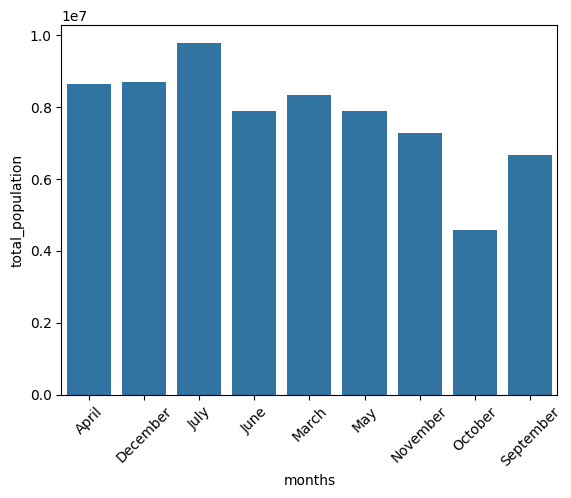

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=monthly_summary, x='months', y='total_population')
plt.xticks(rotation=45)
plt.show()


In [ ]:
district_bio = (
    df_biometric.groupby('district')['total_biometric']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)